In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

from ag_sklearn_transformers import OneHotDummyTransformer

In [2]:
tt = pd.read_csv('train_transaction.csv')

In [3]:
ti = pd.read_csv('train_identity.csv')

In [4]:
df = pd.merge(tt, ti, on='TransactionID', how='outer', indicator=True)

In [5]:
#df = df[df['_merge'] == 'both']
df = df.drop(columns=['_merge'])

df = df.fillna(df.mode().iloc[0])
df = df.fillna(0)

In [6]:
numerical_features = ['XXX'] # fill
categorical_features = ['XXX'] # fill

In [7]:
X = df[numerical_features + categorical_features]
y = df['isFraud'].astype('int')

Number of valid transactions:  569877
Number of fraud transactions:  20663


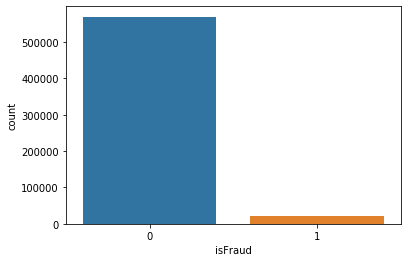

In [8]:
ax = sns.countplot(y, label="Count")
valid, frauds = y.value_counts()
print('Number of valid transactions: ', valid)
print('Number of fraud transactions: ', frauds)

In [9]:
oht = OneHotDummyTransformer(columns=categorical_features)
oht.fit(X)
X = oht.transform(X)

In [10]:
scaler = StandardScaler()
X_columns = X.columns
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=X_columns)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\agali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy 0.9711111863717953


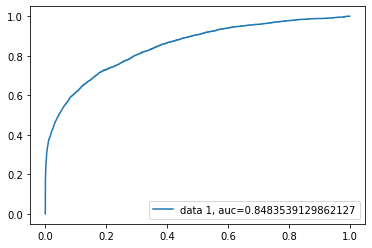

In [13]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [14]:
tt_test = pd.read_csv('test_transaction.csv')
ti_test = pd.read_csv('test_identity.csv')
df_test = pd.merge(tt_test, ti_test, on='TransactionID', how='outer', indicator=True)

In [15]:
#df_test = df_test[df_test['_merge'] == 'both']
df_test = df_test.drop(columns=['_merge'])

df_test = df_test.fillna(df_test.mode().iloc[0])
df_test = df_test.fillna(0)

In [16]:
results = df_test[['TransactionID']]
X = df_test[numerical_features + categorical_features]

In [17]:
X = oht.transform(X)

In [18]:
X_columns = X.columns
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=X_columns)

In [19]:
y_pred = clf.predict(X).tolist()

In [20]:
results['isFraud'] = y_pred

C:\Users\agali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
results.to_csv('results.csv', sep=',', index=False, header=True)